In [1]:
import pandas as pd

C:\Users\gudal\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [13]:
import pandas_profiling
data_profile = pandas_profiling.ProfileReport(df)

In [14]:
data_profile

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

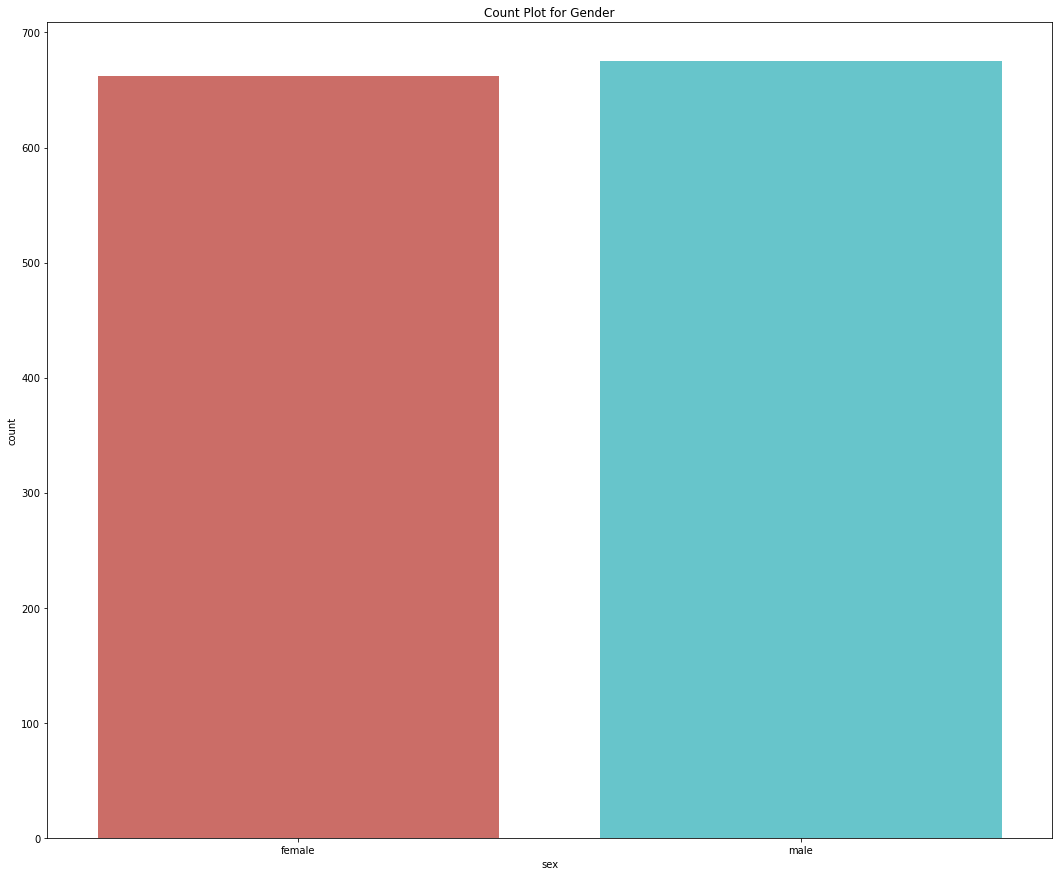

In [18]:
plt.figure(figsize=(18,15))
plt.title('Count Plot for Gender')
sns.countplot(x = 'sex', data = df, palette = 'hls')
plt.show()

In [19]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [20]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

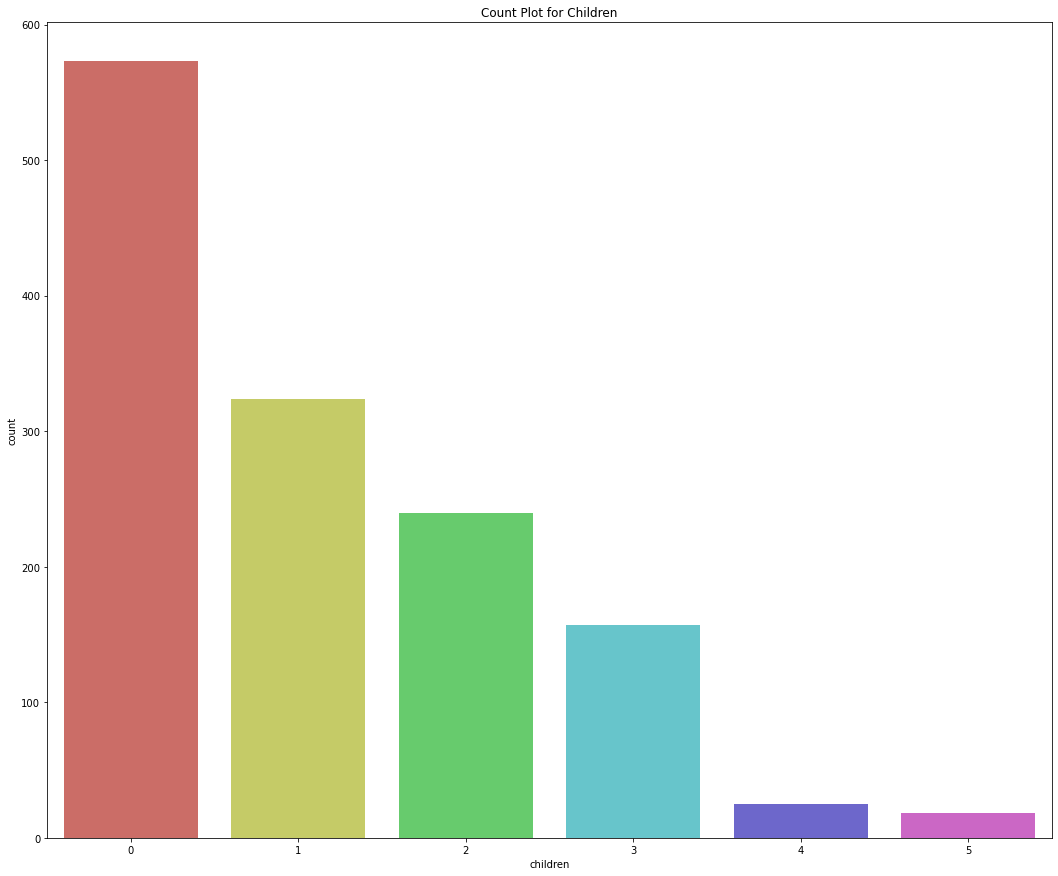

In [21]:
plt.figure(figsize=(18,15))
plt.title('Count Plot for Children')
sns.countplot(x = 'children', data = df, palette = 'hls')
plt.show()

In [22]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

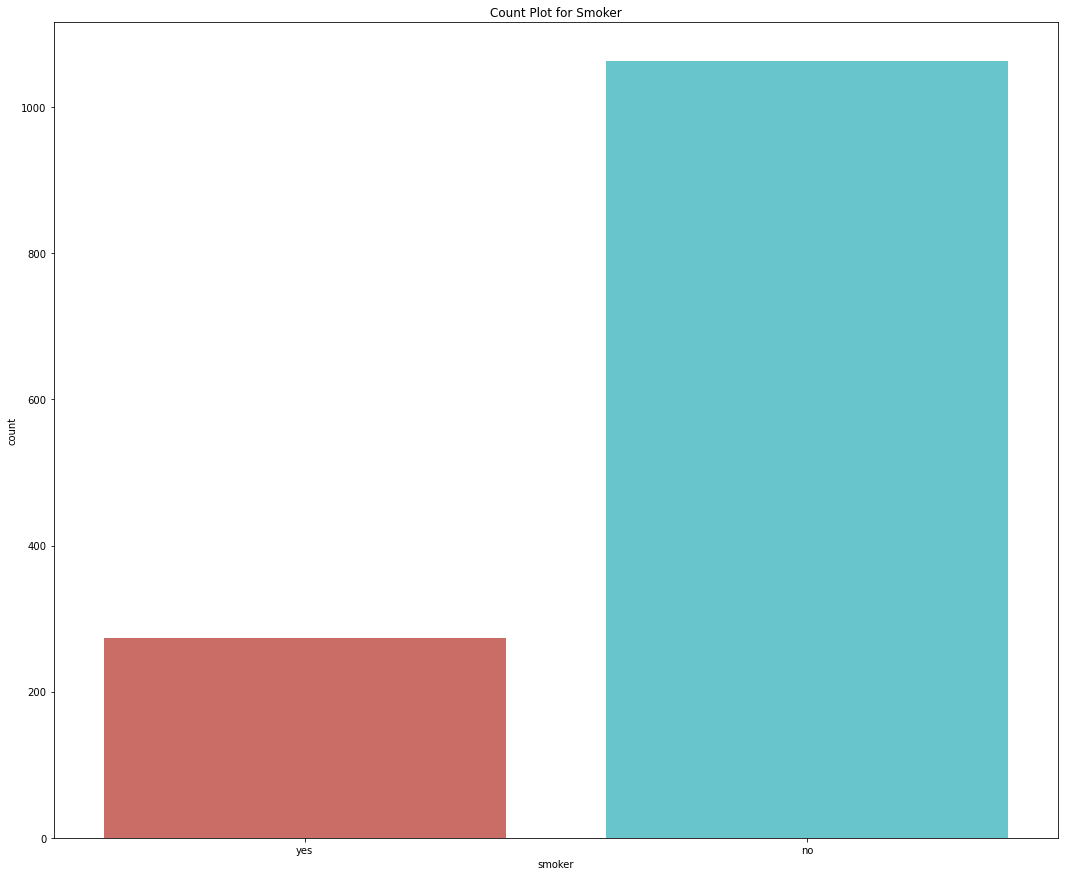

In [24]:
plt.figure(figsize=(18,15))
plt.title('Count Plot for Smoker')
sns.countplot(x = 'smoker', data = df, palette = 'hls')
plt.show()

In [25]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

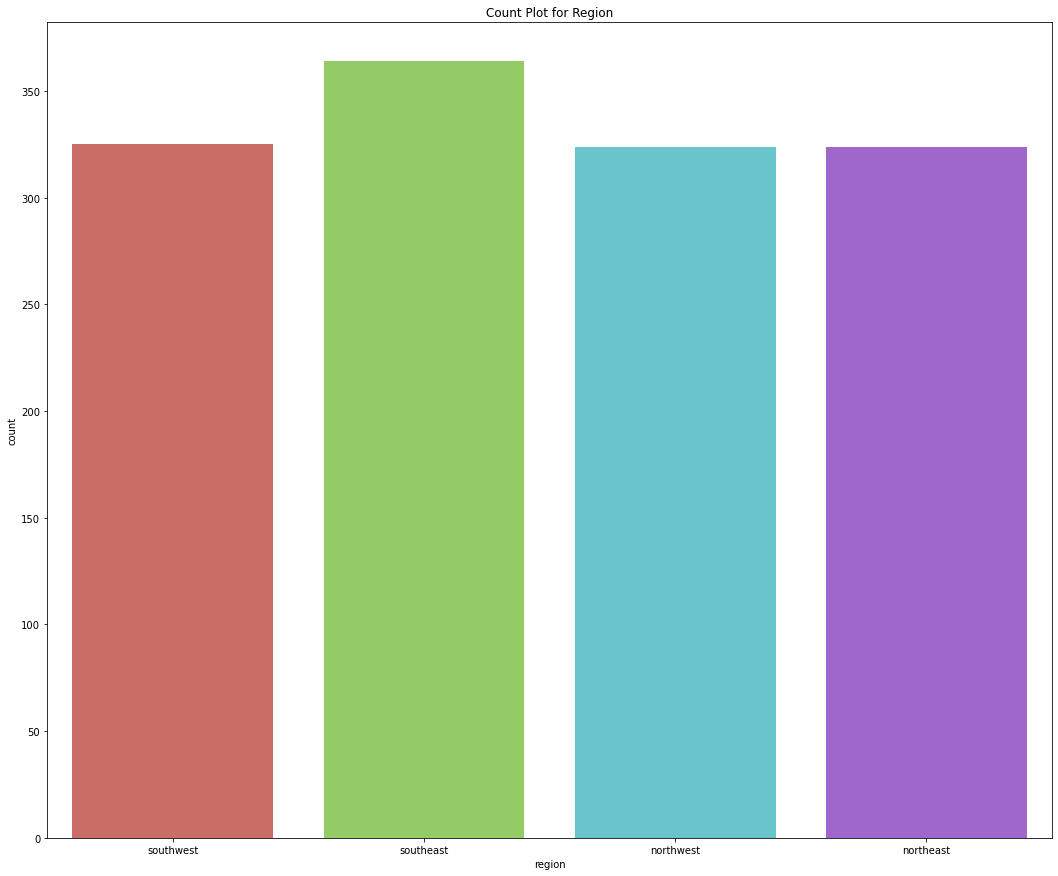

In [27]:
plt.figure(figsize=(18,15))
plt.title('Count Plot for Region')
sns.countplot(x = 'region', data = df, palette = 'hls')
plt.show()

In [28]:
correlation = df.corr()

<ipython-input-28-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot:>

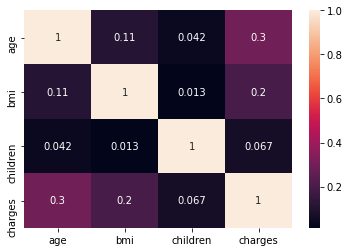

In [29]:
sns.heatmap(correlation, annot = True)

In [30]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [31]:
df_new = pd.get_dummies(df, columns = ['region'])

In [32]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_new.drop(['charges'], axis = 1)
y = df_new['charges']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,
                                                   random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler 

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
X_train.shape

(1002, 9)

In [40]:
y_train.shape

(1002,)

In [41]:
X_test.shape

(335, 9)

In [42]:
y_test.shape

(335,)

In [43]:
#trail

In [44]:
import lazypredict

In [45]:
from lazypredict.Supervised import LazyClassifier

C:\Users\gudal\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\gudal\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\gudal\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [46]:
from lazypredict.Supervised import LazyRegressor
reg_lp = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg_lp.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:40<00:00,  1.03it/s]


In [47]:
display(models,predictions)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4471.78,0.32
RandomForestRegressor,0.87,0.88,4649.03,1.12
HistGradientBoostingRegressor,0.87,0.87,4710.32,1.48
LGBMRegressor,0.87,0.87,4718.30,0.20
BaggingRegressor,0.86,0.86,4864.87,0.12
ExtraTreesRegressor,0.85,0.85,5013.77,0.94
AdaBoostRegressor,0.84,0.84,5209.84,0.09
XGBRegressor,0.83,0.84,5319.85,0.28
KNeighborsRegressor,0.82,0.83,5473.43,0.04


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4471.78,0.32
RandomForestRegressor,0.87,0.88,4649.03,1.12
HistGradientBoostingRegressor,0.87,0.87,4710.32,1.48
LGBMRegressor,0.87,0.87,4718.30,0.20
BaggingRegressor,0.86,0.86,4864.87,0.12
ExtraTreesRegressor,0.85,0.85,5013.77,0.94
AdaBoostRegressor,0.84,0.84,5209.84,0.09
XGBRegressor,0.83,0.84,5319.85,0.28
KNeighborsRegressor,0.82,0.83,5473.43,0.04


In [ ]:
# trail end

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
reg = GradientBoostingRegressor(random_state=0)

In [50]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [51]:
reg.predict(X_test[1:2])

array([7766.11874607])

In [52]:
y_pred = reg.predict(X_test)

In [53]:
import pickle

In [54]:
pickle.dump(reg,open('insurance_charges.p','wb'))

In [55]:
df_new.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [56]:
reg.predict([[45,0,24,1,0,0,0,1,0]])

array([16725.24135812])

In [57]:
df_new.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.92,0,0,0,1
1,18,1,33.77,1,0,1725.55,0,0,1,0
2,28,1,33.00,3,0,4449.46,0,0,1,0
3,33,1,22.70,0,0,21984.47,0,1,0,0
4,32,1,28.88,0,0,3866.86,0,1,0,0
